In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

In [2]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

**Loading dataset**

In [3]:
weight_height = pd.read_csv("weight_height.csv")
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Descriptive stats**

**Weight vs Height**

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


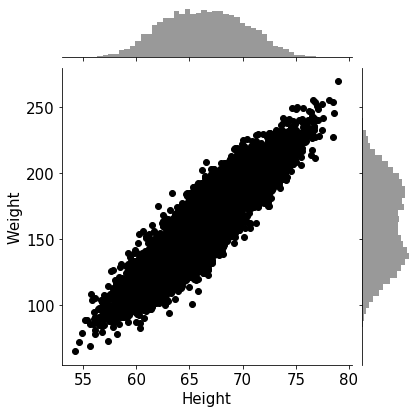

In [4]:
sns.jointplot(x="Height", y="Weight", data=weight_height, color = "k")

In [5]:
weight = weight_height.Weight
height = weight_height.Height

In [6]:
from scipy import stats
stats.pearsonr(height, weight)

(0.9247562987409146, 0.0)

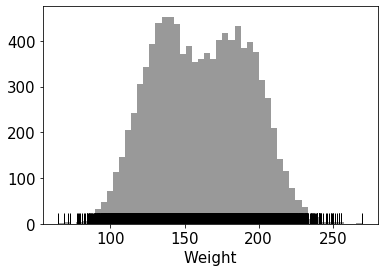

In [7]:
sns.distplot(weight, bins = 50, kde=False, rug=True, color = "k")

**Weight ECDF**

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


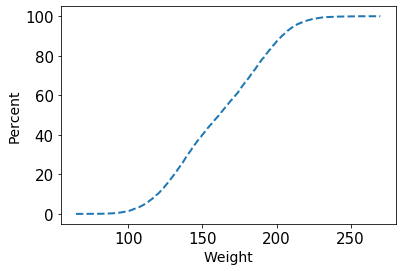

In [8]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(weight)

# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)


# Label axes and show plot
_ = plt.xlabel('Weight', size = 14)
_ = plt.ylabel('Percent', size = 14)
plt.show()

In [9]:
print("""
50th and 85th Percentile values are: {0:.2f} and {1:.2f}
""".format(*np.percentile(weight, [50, 85])))



50th and 85th Percentile values are: 161.21 and 197.54



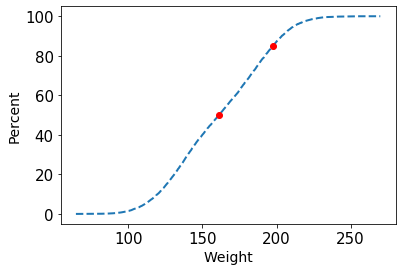

In [17]:
percentiles = np.array([50 , 85])
ptiles_vers = np.percentile(weight, percentiles)

# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(weight)

# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)


# Label axes and show plot
_ = plt.xlabel('Weight', size = 14)
_ = plt.ylabel('Percent', size = 14)

_ = plt.plot(ptiles_vers, percentiles, marker='o', color='red',
         linestyle='none')

plt.show()

**Male and Female Weight ECDF**

In [10]:
male_weight = weight_height[weight_height.Gender == "Male"].Weight
female_weight = weight_height[weight_height.Gender == "Female"].Weight

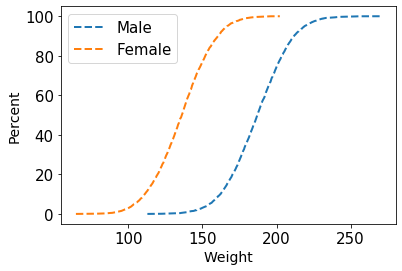

In [11]:
# Generate x and y values for ECDF: x, y
x_male, y_male = dcst.ecdf(male_weight)
x_female, y_female = dcst.ecdf(female_weight)

# Plot the ECDF as dots
_ = plt.plot(x_male, y_male*100, linestyle='--', lw = 2)
_ = plt.plot(x_female, y_female*100, linestyle='--', lw = 2)


# Label axes and show plot
_ = plt.legend(("Male", "Female"))
_ = plt.xlabel('Weight', size = 14)
_ = plt.ylabel('Percent', size = 14)
plt.show()

In [12]:
print("""
Male's 50th and 85th Percentile values are {0:.2f} and {1:.2f}
""".format(*np.percentile(male_weight, [50, 85])))

print("""
Female's 50th and 85th Percentile values are {0:.2f} and {1:.2f}
""".format(*np.percentile(female_weight, [50, 85])))


Male's 50th and 85th Percentile values are 187.03 and 207.25


Female's 50th and 85th Percentile values are 136.12 and 155.89

